<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/M%C3%A9tododeC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consideremos el problema

$\frac{\mathrm{d^2 u} }{\mathrm{d} x^2}+u=x$

con las condiciones $u(0)=0$ y $u´(0)=2$.

Resolveremos este problema usando el método de colocación, proponemos una solución de la forma:

$U_N=\sum_{i=1}^{N}α_iβ_i(x)=α_1β_1(x)+α_2β_2(x)+...+α_Nβ_N(x)$

donde las $β_i(x)$ son llamadas funciones base.

Una medida de la aproximación de la solución $U_N$ es a través del error

$E=\frac{\mathrm{d^2 U_N} }{\mathrm{d} x^2}+U_N-x$

Para nuestro ejemplo solo necesitamos dos funciones base:

$U_N=α_1β_1(x)+α_2β_2(x)=α_1x(1-x)+α_2x^2(1-x)$

Para asegurarnos que será solución de la EDO imponemos que $E=0$, sustitimos y evaluamos en los puntos dados $x=\frac{1}{2}$ y $x=1$.

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = sp.symbols('x') # variable
u = sp.Function('u') # función

In [ ]:
ode = u(x).diff(x,x) + u(x) - x
sp.dsolve(ode,u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [ ]:
sol = sp.dsolve(ode, ics={u(0):0,u(x).diff(x).subs(x, 0):2}) # ics es un diccionario

In [ ]:
sol

Eq(u(x), x + sin(x))

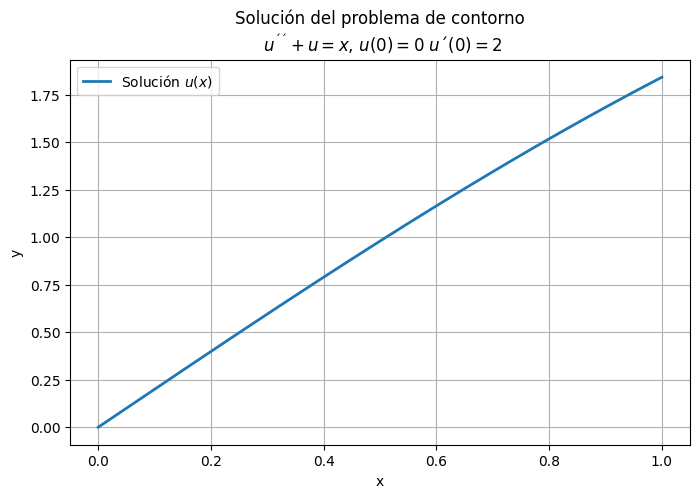

In [37]:
u_expr = sol.rhs

u_num = sp.lambdify(x,u_expr,"numpy")

xx = np.linspace(0,1,400)
yy = u_num(xx)

plt.figure(figsize=(8, 5))
plt.plot(xx, yy, label="Solución $u(x)$", linewidth=2)
plt.title('Solución del problema de contorno\n $u^{´´} + u=x$, $u(0)=0$ $u´(0)=2$')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

In [106]:
a,b,c,d=sp.symbols('a b c d')

u_n=a+b*x+c*x**2+d*x**3

In [107]:
u_n

a + b*x + c*x**2 + d*x**3

In [108]:
u_n_2=sp.diff(u_n,x,2)

F=u_n_2+u_n-x

In [109]:
F

a + b*x + c*x**2 + d*x**3 - x + 2*(c + 3*d*x)

Sustituyendo las condiciones iniciales tenemos que $a=0$ y $b=2$.

In [131]:
a_sym, b_sym, c_sym, d_sym = sp.symbols('a b c d')

F_substituted = F.subs({a_sym:0, b_sym:2})
F_substituted

c*x**2 + d*x**3 + x + 2*(c + 3*d*x)

Aquí definimos los puntos requeridos por el problema, para posteriormente igualarlos con el error, obtener el sistema de $2$x$2$ y resolverlo para obtener los valores de $α_1$ y $α_2$, en este caso se nombraron como $a$ y $b$.

In [110]:
points=[sp.Rational(1,2),1]

In [111]:
points

[1/2, 1]

In [132]:
eqs=[sp.Eq(F_substituted.subs(x,p),0) for p in points]
sol_1=sp.solve(eqs,[c_sym, d_sym])

In [133]:
for eq in eqs:
    print(eq)

Eq(9*c/4 + 25*d/8 + 1/2, 0)
Eq(3*c + 7*d + 1, 0)


In [134]:
print("Sistema de ecuaciones simbólico:")
for eq in eqs:
    sp.pprint(eq)

Sistema de ecuaciones simbólico:
9⋅c   25⋅d   1    
─── + ──── + ─ = 0
 4     8     2    
3⋅c + 7⋅d + 1 = 0


In [135]:
sol_1

{c: -1/17, d: -2/17}

In [144]:
u_b=2*x+c*x**2+d*x**3

In [145]:
u_b

c*x**2 + d*x**3 + 2*x

In [146]:
u_approx=u_b.subs(sol_1)

In [147]:
u_approx

-2*x**3/17 - x**2/17 + 2*x

In [152]:
u_approx_2=sp.diff(u_approx,x,2)
u_approx_2

-2*(6*x + 1)/17

Calculamos el error de la aproximación numérica:

In [155]:
E=u_approx_2+u_approx-x

In [156]:
E

-2*x**3/17 - x**2/17 + x - 2*(6*x + 1)/17

Ahora con el error calculado evaluamos cada uno de los puntos, para comprobar si se cumple que $E=0$. Empezamos con $x=\frac{1}{2}$

In [157]:
E_a=E.subs(x,1/2)
E_a

3.46944695195361e-18

Finalmente con $x=1$

In [158]:
E_b=E.subs(x,1)
E_b

0

In [159]:
u_approx_fn=sp.lambdify(x,u_approx,"numpy")

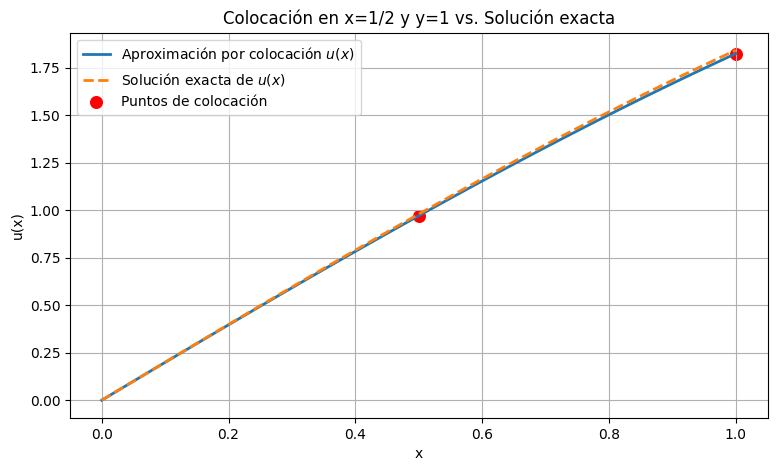

In [160]:
xx=np.linspace(0,1,100)
yy = u_num(xx)

plt.figure(figsize=(9, 5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación $u(x)$", linewidth=2)
plt.plot(xx,yy, "--", label="Solución exacta de $u(x)$", linewidth=2)

plt.scatter([0.5,1], u_approx_fn(np.array([0.5,1])),
            color="red", s=70, label="Puntos de colocación")


plt.title('Colocación en x=1/2 y y=1 vs. Solución exacta')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()